<a href="https://colab.research.google.com/github/AnanyaGodse/Image-Processing-and-Computer-Vision-I/blob/main/IPCV_Experiment_2_Image_Negative%2C_Thresholding%2C_Gray_Level_Slicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Ananya Godse SAP ID: 60009220161 Batch: D1-1**

### **Lab 2: Image Negative Transformation, Thresholding, Gray Level Slicing with & without Background**

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
(train_images, train_labels), (_,_) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))

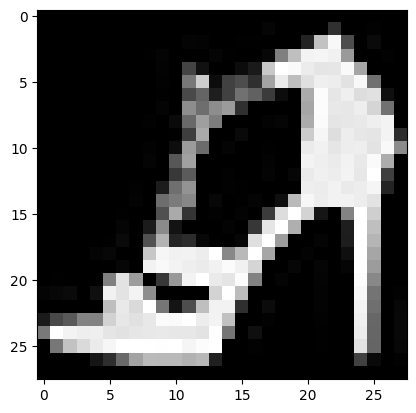

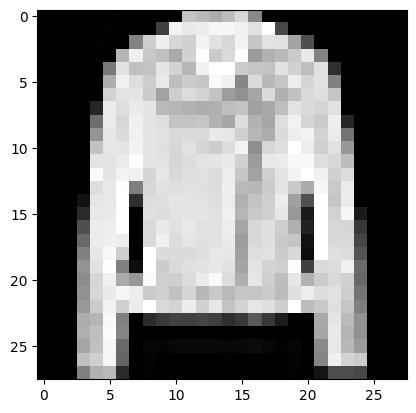

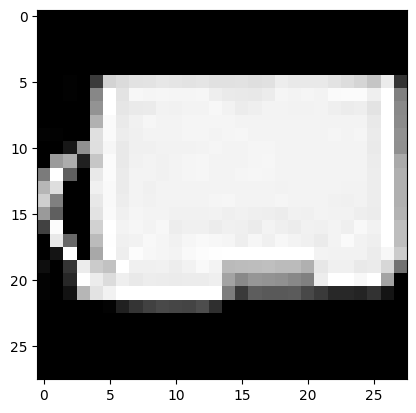

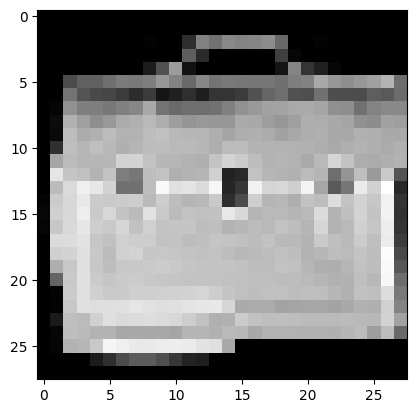

In [ ]:
for i in range(1, 5):
  random_index = random.randint(0, len(train_images))
  plt.imshow(train_images[random_index].reshape(28, 28), cmap='gray')
  plt.show()

**Negative Transformation:**

Creating a negative image involves inverting the colors, where each pixel's value is subtracted from the maximum possible value (e.g., in an 8-bit grayscale image, 255).

**Applications:**
* ***Medical Imaging:*** Enhancing certain features in X-rays or other scans by emphasizing lighter areas that might represent abnormalities.
* ***Astronomy:*** Highlighting faint celestial objects by inverting the image, making it easier to spot stars, galaxies, or other phenomena.
* ***Photography:*** Analog film processing uses negative images as intermediates to create final prints. It can also help in adjusting contrast and brightness in digital photography.
* ***Forensics:*** Revealing hidden details in an image by reversing the tones, which might make it easier to see latent fingerprints or other forensic evidence.


In [ ]:
def make_negative(img):
  neg_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      neg_img[i][j] = 255 - img[i][j]

  return neg_img



In [ ]:
img = train_images[5]

In [ ]:
neg_img = make_negative(img)

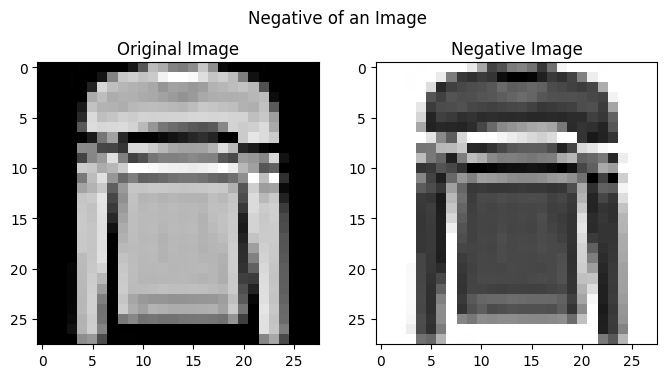

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(neg_img, cmap='gray')
plt.title('Negative Image')

plt.suptitle('Negative of an Image')
plt.show()

**Thresholding:**

Thresholding converts an image to a binary format (black and white), where pixels are set to white if their intensity is above a certain threshold and black if below.

**Applications:**
* ***Document Scanning:*** Converting scanned documents into black-and-white images, making it easier to store and analyze text.
* ***Medical Imaging:*** Isolating specific structures in scans, like tumors in MRI or CT images, by separating them from the surrounding tissue.
* ***Object Detection:*** Simplifying the image to detect objects, edges, or patterns, useful in machine vision systems.
* ***Image Segmentation:*** Dividing an image into regions or objects for further analysis, such as in facial recognition or traffic sign detection.



In [ ]:
def thresholding(img, threshold):
  threshold_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= threshold:
        threshold_img[i][j] = 255
      else:
        threshold_img[i][j] = 0

  return threshold_img


In [ ]:
threshold_img = thresholding(img, 150)

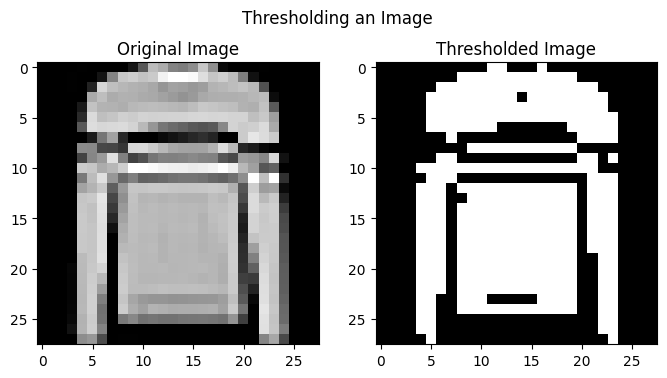

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(threshold_img, cmap='gray')
plt.title('Thresholded Image')

plt.suptitle('Thresholding an Image')
plt.show()

**Gray Level Slicing Without Background:**

Gray level slicing without background isolates a specific range of gray levels, setting all other pixels to black, effectively removing the background.

**Applications:**
* ***Target Detection:*** Isolating specific features, such as detecting certain materials or objects in an image, by ignoring irrelevant background information.
* ***Medical Imaging:*** Focusing on specific structures, such as isolating a tumor from surrounding tissues to study its shape and size without interference from other parts of the image.
* ***Quality Control:*** In manufacturing, isolating specific features or defects on a product, ignoring the rest of the image, for automated inspection systems.

In [ ]:
def gray_level_slicing_without_bg(img, a, b):
  sliced_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= a and img[i][j] < b:
        sliced_img[i][j] = 255
      else:
        sliced_img[i][j] = 0

  return sliced_img



In [ ]:
sliced_img_without_bg = gray_level_slicing_without_bg(img, 100, 200)

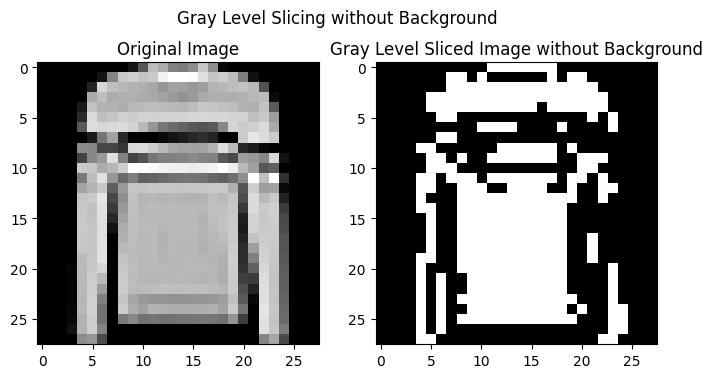

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img_without_bg, cmap='gray')
plt.title('Gray Level Sliced Image without Background')

plt.suptitle('Gray Level Slicing without Background')
plt.show()

**Gray Level Slicing with Background:**

Gray level slicing with background highlights a specific range of gray levels while keeping the background intact.

**Applications:**
* ***Medical Imaging:*** Emphasizing specific tissues or organs in medical scans, while still displaying surrounding structures for context.
* ***Remote Sensing:*** Enhancing certain features in satellite images, such as vegetation or water bodies, while retaining the background information.
* ***Industrial Inspection:*** Highlighting defects or specific parts of an object in an image while still displaying the entire object for reference.



In [ ]:
def gray_level_slicing_with_bg(img, a, b):
  sliced_img = img.copy()
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] >= a and img[i][j] < b:
        sliced_img[i][j] = img[i][j]
      else:
        sliced_img[i][j] = 0

  return sliced_img



In [ ]:
sliced_img_with_bg = gray_level_slicing_with_bg(img, 100, 200)

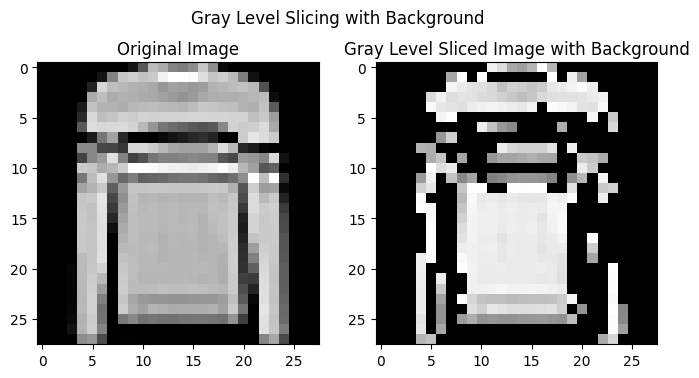

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_img_with_bg, cmap='gray')
plt.title('Gray Level Sliced Image with Background')

plt.suptitle('Gray Level Slicing with Background')
plt.show()

**Performing all the above operations on a new image:**

In [ ]:
new_img = cv2.imread('Otter.jpg')
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

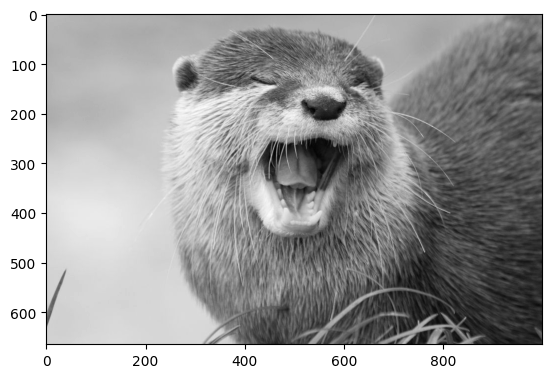

In [ ]:
plt.imshow(new_img, cmap='gray')
plt.show()

In [ ]:
neg_new_img = make_negative(new_img)

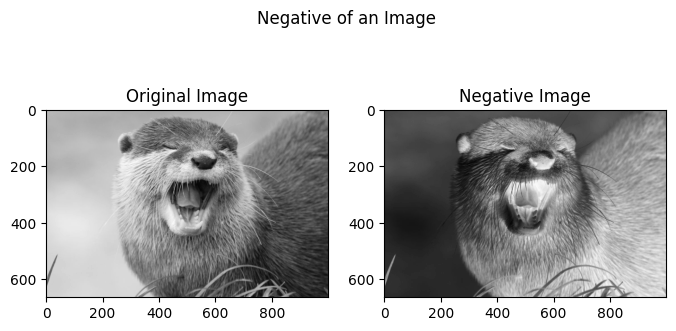

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(neg_new_img, cmap='gray')
plt.title('Negative Image')

plt.suptitle('Negative of an Image')
plt.show()

In [ ]:
threshold_new_img = thresholding(new_img, 100)

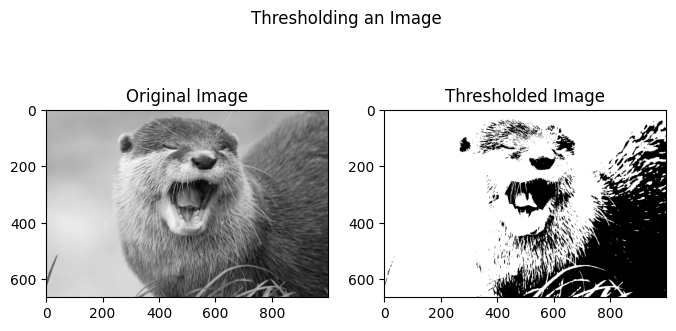

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(threshold_new_img, cmap='gray')
plt.title('Thresholded Image')

plt.suptitle('Thresholding an Image')
plt.show()

In [ ]:
sliced_new_img_without_bg = gray_level_slicing_without_bg(new_img, 100, 200)

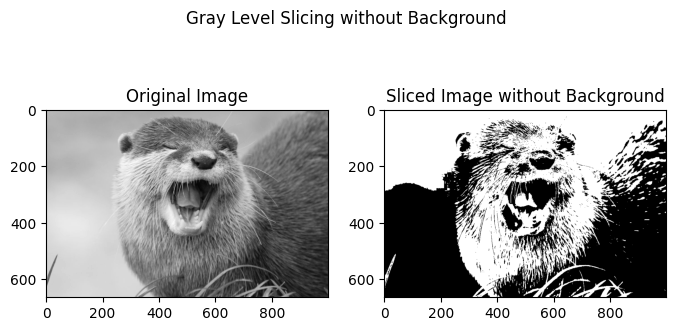

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_new_img_without_bg, cmap='gray')
plt.title('Sliced Image without Background')

plt.suptitle('Gray Level Slicing without Background')
plt.show()

In [ ]:
sliced_new_img_with_bg = gray_level_slicing_with_bg(new_img, 100, 200)

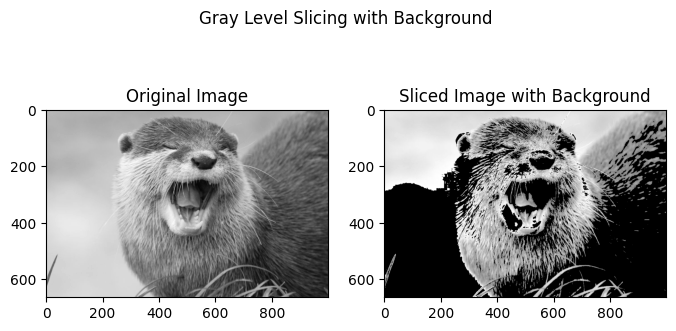

In [ ]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(new_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sliced_new_img_with_bg, cmap='gray')
plt.title('Sliced Image with Background')

plt.suptitle('Gray Level Slicing with Background')
plt.show()

**Conclusion:**

We have successfully performed image processing operations such as negative transformation, thresholding, gray level slicing with background and without background, on images from the MNIST Fashion dataset. Additionally, all these operations were also performed on a different image.

We have also studied the real-life applications of these operations.